In [1]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg


# Task 4

In [0]:
(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])



In [0]:
def getAffineTransform_custom(pts1, pts2):
  A = np.arange(36).reshape(6, 6)
  A[0, :] = (pts1[0][0], pts1[0][1], 0, 0, 1, 0)
  A[1, :] = (0, 0, pts1[0][0], pts1[0][1], 0, 1)
  A[2, :] = (pts1[1][0], pts1[1][1], 0, 0, 1, 0)
  A[3, :] = (0, 0, pts1[1][0], pts1[1][1], 0, 1)
  A[4, :] = (pts1[2][0], pts1[2][1], 0, 0, 1, 0)
  A[5, :] = (0, 0, pts1[2][0], pts1[2][1], 0, 1)

  res = np.arange(6).reshape(6, 1)
  res[0] = pts2[0][0]
  res[1] = pts2[0][1]
  res[2] = pts2[1][0]
  res[3] = pts2[1][1]
  res[4] = pts2[2][0]
  res[5] = pts2[2][1]

  x = np.matmul(np.linalg.inv(A), res)
  M_manual = np.zeros((2,3))
  M_manual[0,0] = x[0,0]; M_manual[0,1] = x[1,0]; M_manual[0,2] = x[4,0]
  M_manual[1,0] = x[2,0]; M_manual[1,1] = x[3,0]; M_manual[1,2] = x[5,0]
  
  return M_manual

Original


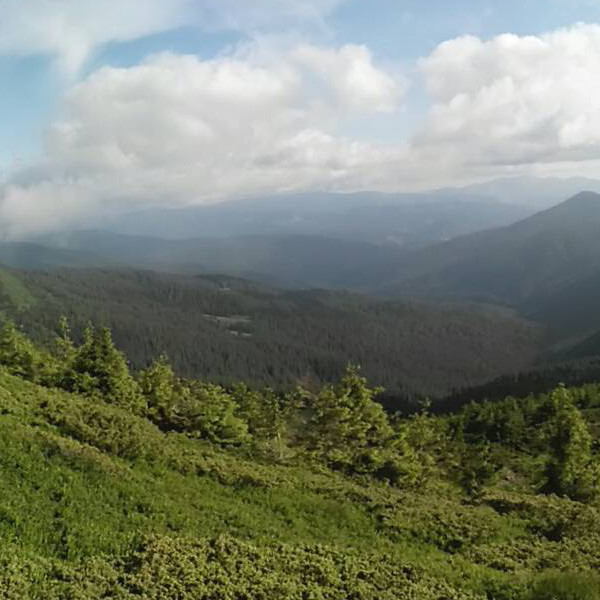

Custom implementation


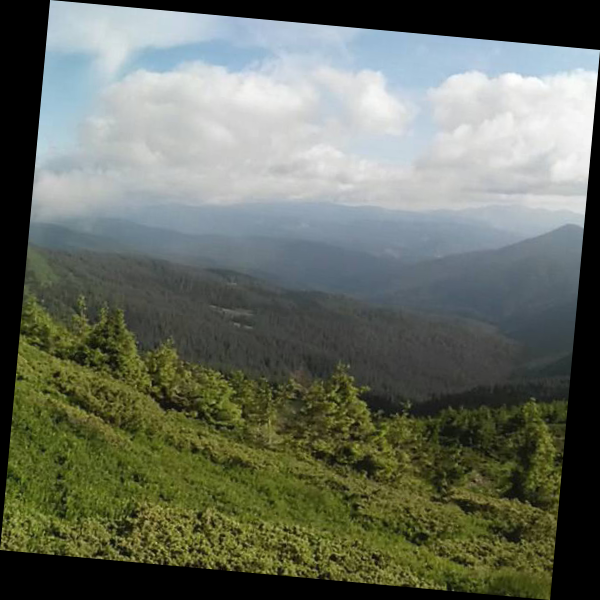

Open CV implementation


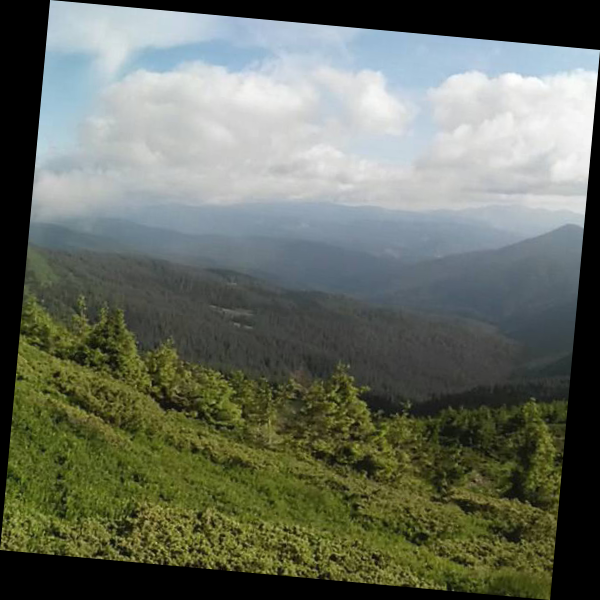

In [4]:
M_custom = getAffineTransform_custom(pts1,pts2)
dst_custom = cv2.warpAffine(img, M_custom, img.shape[:2])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img, M, img.shape[:2])

print("Original")
cv2_imshow(img)
print("Custom implementation")
cv2_imshow(dst_custom)
print("Open CV implementation")
cv2_imshow(dst)

# Task 5

In [5]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])


downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


In [0]:
def getPerspectiveTransform_custom(pts1,pts2):
  x_0 = pts1[0,0];  y_0 = pts1[0,1];
  x_1 = pts1[1,0];  y_1 = pts1[1,1];
  x_2 = pts1[2,0];  y_2 = pts1[2,1];
  x_3 = pts1[3,0];  y_3 = pts1[3,1];
  
  x_new_0 = pts2[0,0];  y_new_0 = pts2[0,1];
  x_new_1 = pts2[1,0];  y_new_1 = pts2[1,1];
  x_new_2 = pts2[2,0];  y_new_2 = pts2[2,1];
  x_new_3 = pts2[3,0];  y_new_3 = pts2[3,1];
  
  res = np.zeros((13,1))
  res[12] = 1
  
  A = np.zeros((13, 13))
  
  A[0,0] = x_0; A[0,1] = y_0; A[0,2] = 1; A[0,9] = -x_new_0; 
  A[1,3] = x_0; A[1,4] = y_0; A[1,5] = 1; A[1,9] = -y_new_0; 
  A[2,6] = x_0; A[2,7] = y_0; A[2,8] = 1; A[2,9] = -1; 
  
  A[3,0] = x_1; A[3,1] = y_1; A[3,2] = 1; A[3,10] = -x_new_1; 
  A[4,3] = x_1; A[4,4] = y_1; A[4,5] = 1; A[4,10] = -y_new_1; 
  A[5,6] = x_1; A[5,7] = y_1; A[5,8] = 1; A[5,10] = -1; 
  
  A[6,0] = x_2; A[6,1] = y_2; A[6,2] = 1; A[6,11] = -x_new_2; 
  A[7,3] = x_2; A[7,4] = y_2; A[7,5] = 1; A[7,11] = -y_new_2; 
  A[8,6] = x_2; A[8,7] = y_2; A[8,8] = 1; A[8,11] = -1; 
  
  A[9,0] = x_3; A[9,1] = y_3; A[9,2] = 1; A[9,12] = -x_new_3; 
  A[10,3] = x_3; A[10,4] = y_3; A[10,5] = 1; A[10,12] = -y_new_3; 
  A[11,6] = x_3; A[11,7] = y_3; A[11,8] = 1; A[11,12] = -1; 
  
  A[12,8] = 1
  
  return np.matmul(np.linalg.inv(A), res)[:9].reshape(3,3)


Original


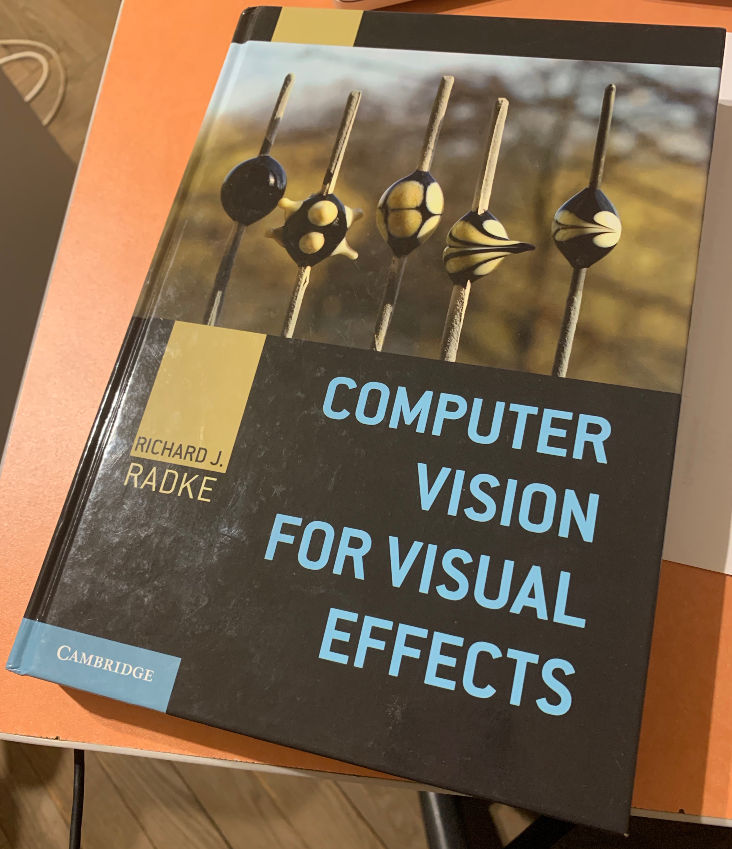

Custom implementation


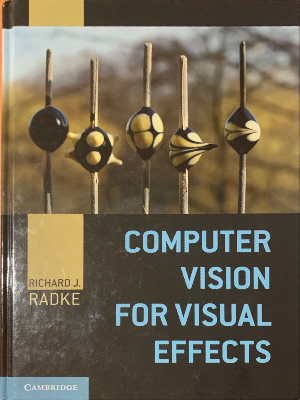

Open CV implementation


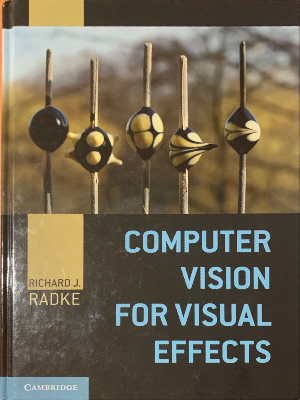

In [7]:
M_custom = getPerspectiveTransform_custom(pts1,pts2)
dst_custom = cv2.cv2.warpPerspective(img, M_custom, (300, 400))

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.cv2.warpPerspective(img,M,(300, 400))

print("Original")
cv2_imshow(img)
print("Custom implementation")
cv2_imshow(dst_custom)
print("Open CV implementation")
cv2_imshow(dst)